# Laboratorium 01 - Temat: Tworzenie modelu ML w Pythonie. Zapisywanie i wersjonowanie modelu . 
#### Oskar Walawender 06.03.2025
### Cel ćwiczenia:


Celem ćwiczenia jest stworzenie prostego modelu uczenia maszynowego w Pythonie (skorzystanie z biblioteki scikit-learn lub TensorFlow); Zapisywanie i wersjonowanie modelu (pickle, joblib); Omówienie różnic między środowiskiem deweloperskim a produkcyjnym. 



## Zadanie 1

### Import bibliotek

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump

### Import zbioru danych

In [2]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [3]:
X.max(axis=0), X.min(axis=0)

(array([7.9, 4.4, 6.9, 2.5]), array([4.3, 2. , 1. , 0.1]))

In [4]:
X.shape, X.dtype

((150, 4), dtype('float64'))

## Zadanie 2

### Podział danych na zbiór testowy i treningowy

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
) 

### Deklaracja modelu

In [35]:
rf = RandomForestClassifier(random_state=42, n_estimators=2,max_features=1, max_depth=2)

### Trening, predykcja i ocena modelu

In [36]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_features=1, n_estimators=2,
                       random_state=42)

In [37]:
y_pred = rf.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2,
       1, 2, 2, 2, 1, 0, 2, 0])

In [38]:
test_acc = accuracy_score(y_test, y_pred)

print("Accuracy (test):", test_acc)

Accuracy (test): 0.9333333333333333


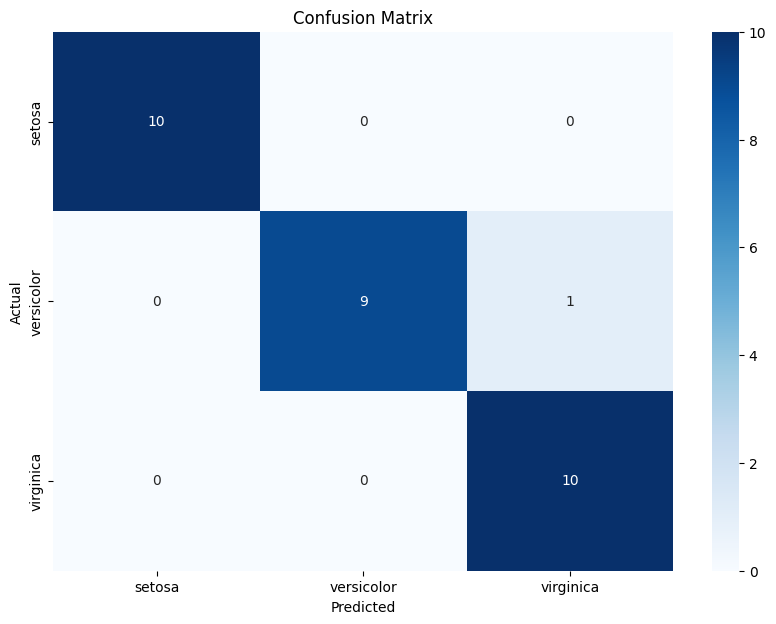

In [10]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Zadanie 3

In [11]:
# Save the trained model to a file
dump(rf, 'model.joblib')

['model.joblib']